# EARLY STAGE PREDICTION OF ALZHEIMER'S USING MRI DATA AND MACHINE LEARNING
----

#  DATA
---
The team has found MRI related data that was generated by the Open Access Series of Imaging Studies (OASIS) project that is available both, on their [website](www.oasis-brains.org) that can be utilized for the purpose of training various machine learning models to identify patients with mild to moderate dementia.

##   DATASET DESCRIPTION
 * This set consists of a [cross-sectional collection]('https://www.oasis-brains.org/#oasis1') of 416 subjects aged 18 to 96.
 * For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included.
 * The subjects are all right-handed and include both men and women.
 * 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD).
 * Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.

##  COLUMN DESCRIPTORS  

|COL  |FULL-FORMS                          |
|-----|------------------------------------|
|EDUC |Years of education                  |
|SES  |Socioeconomic Status                |
|MMSE |Mini Mental State Examination       |
|CDR  |Clinical Dementia Rating            |
|eTIV |Estimated Total Intracranial Volume |
|nWBV |Normalize Whole Brain Volume        |
|ASF  |Atlas Scaling Factor                |


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df = pd.read_csv('/content/oasis_cross_sectional.csv')

df.head(10)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,NaN,1131,0.862,1.551,NaN
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,NaN,1516,0.830,1.157,NaN
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,NaN,1505,0.843,1.166,NaN
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,NaN


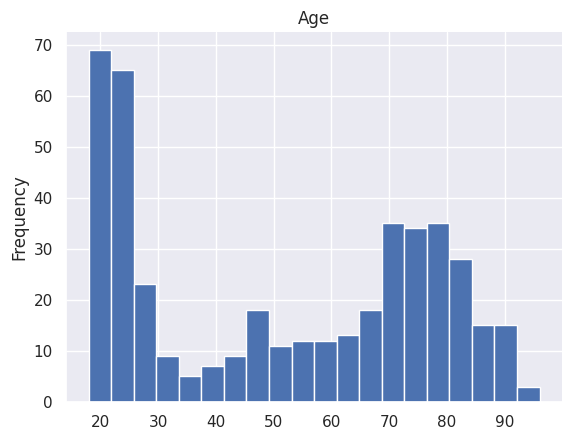

In [ ]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

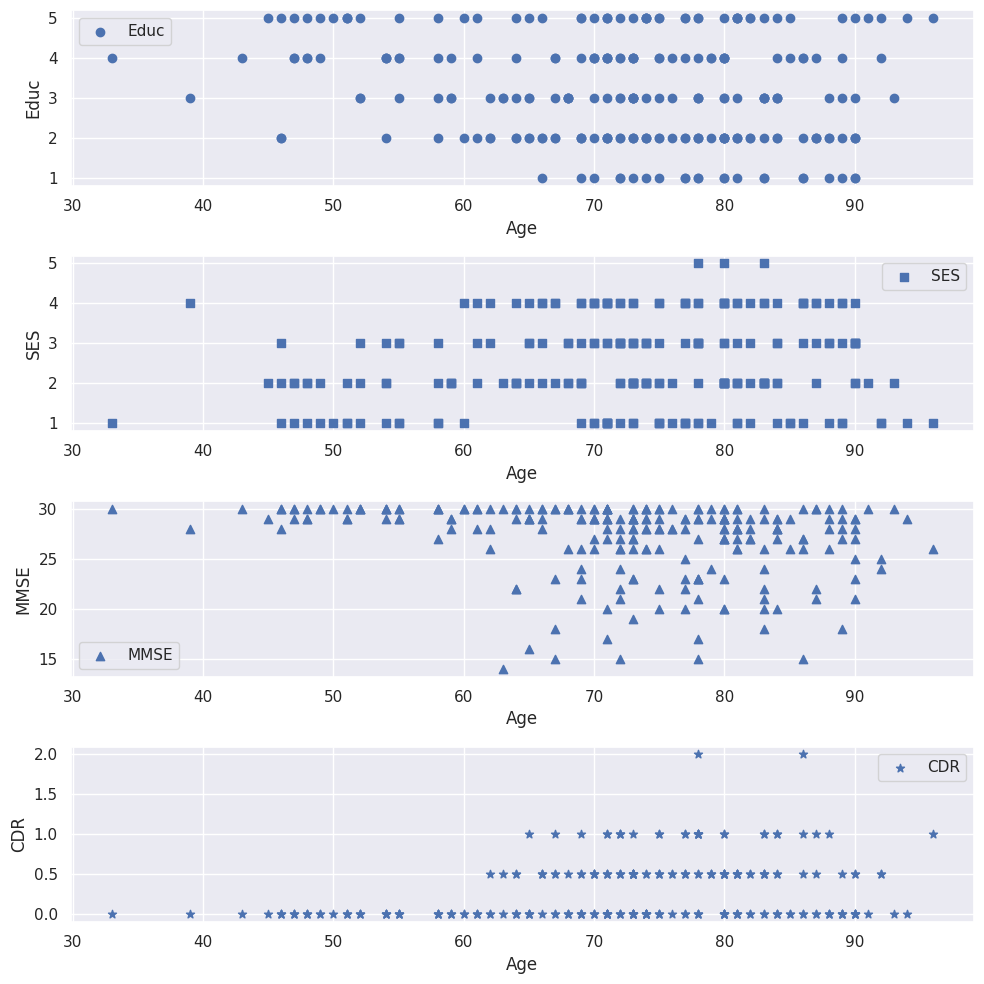

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10, 10))

# Scatter plot for Educ on ax1
ax1.scatter(df['Age'], df['Educ'], label='Educ', marker='o')
ax1.set_xlabel('Age')
ax1.set_ylabel('Educ')
ax1.legend()

# Scatter plot for SES on ax2
ax2.scatter(df['Age'], df['SES'], label='SES', marker='s')
ax2.set_xlabel('Age')
ax2.set_ylabel('SES')
ax2.legend()

# Scatter plot for MMSE on ax3
ax3.scatter(df['Age'], df['MMSE'], label='MMSE', marker='^')
ax3.set_xlabel('Age')
ax3.set_ylabel('MMSE')
ax3.legend()

# Scatter plot for CDR on ax4
ax4.scatter(df['Age'], df['CDR'], label='CDR', marker='*')
ax4.set_xlabel('Age')
ax4.set_ylabel('CDR')
ax4.legend()

plt.tight_layout()
plt.show()

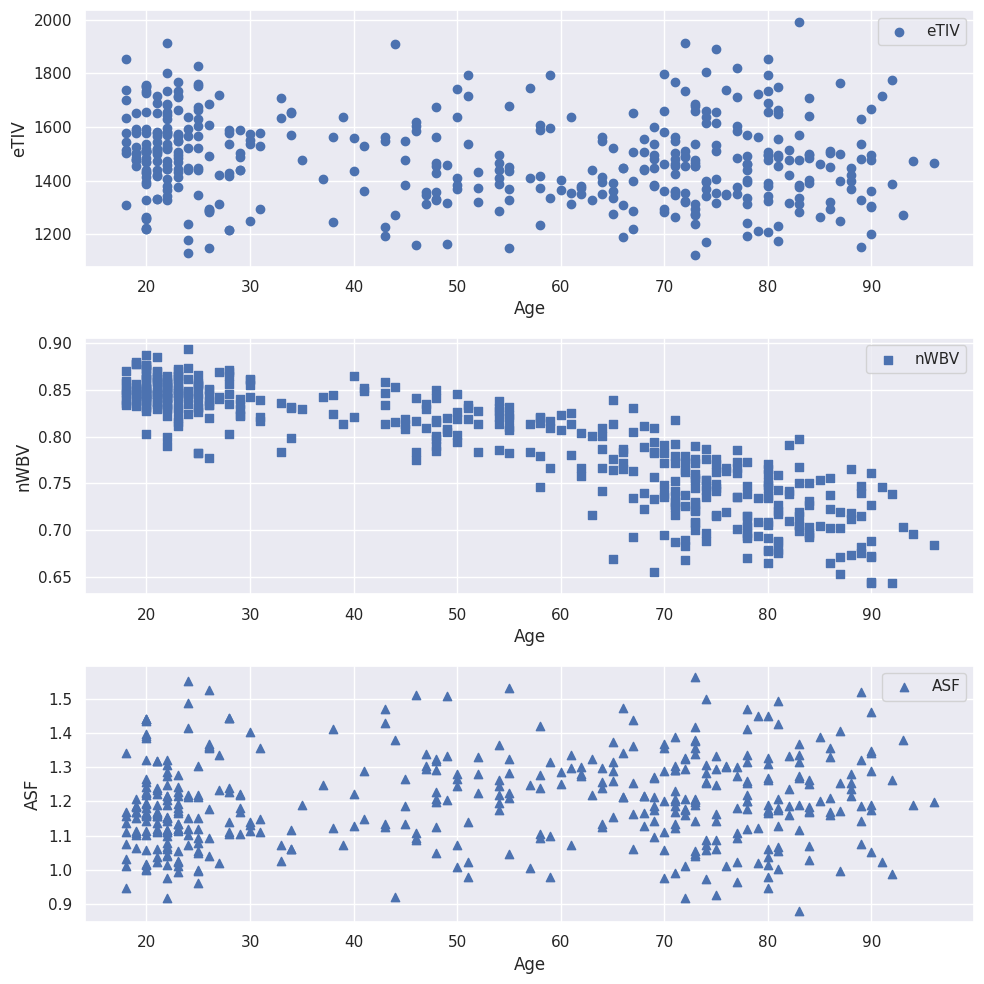

In [ ]:
import matplotlib.pyplot as plt

# Create three separate subplots
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 10))

# Scatter plot for eTIV on ax1
ax1.scatter(df['Age'], df['eTIV'], label='eTIV', marker='o')
ax1.set_xlabel('Age')
ax1.set_ylabel('eTIV')
ax1.legend()

# Scatter plot for nWBV on ax2
ax2.scatter(df['Age'], df['nWBV'], label='nWBV', marker='s')
ax2.set_xlabel('Age')
ax2.set_ylabel('nWBV')
ax2.legend()

# Scatter plot for ASF on ax3
ax3.scatter(df['Age'], df['ASF'], label='ASF', marker='^')
ax3.set_xlabel('Age')
ax3.set_ylabel('ASF')
ax3.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and preprocessed your dataset
df = pd.read_csv('/content/oasis_cross_sectional.csv')

def update_age(x):
    if x >= 60:
        return 2
    elif 35 <= x < 60:
        return 1
    else:
        return 0

df['Age'] = df['Age'].apply(update_age)

In [ ]:
df = df.reset_index(drop=True)
df = df.drop(['M/F', 'Educ', 'SES', 'MMSE', 'CDR', 'ID', 'Delay', 'Hand'], axis=1)
dataset = df.fillna(method='ffill')
df.head(5)

,Age,eTIV,nWBV,ASF
0,2,1344,0.743,1.306
1,1,1147,0.810,1.531
2,2,1454,0.708,1.207
3,0,1588,0.803,1.105
4,0,1737,0.848,1.010


In [ ]:
class_counts = df['Age'].value_counts()

print("Class Counts before oversampling:")
print(class_counts)

Class Counts before oversampling:
2    198
0    169
1     69
Name: Age, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Oversampling using SMOTE for minority class (class 1)
X = dataset.drop('Age', axis=1)
y = dataset['Age']
smote = SMOTE(sampling_strategy={1: class_counts.max(), 0: class_counts.max(), 2: class_counts.max()})
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine X_resampled and y_resampled into a new DataFrame
oversampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Age')], axis=1)

class_counts_oversampled = oversampled_df['Age'].value_counts()
print("\nClass Counts after oversampling:")
print(class_counts_oversampled)



Class Counts after oversampling:
2    198
1    198
0    198
Name: Age, dtype: int64


In [ ]:
# Splitting the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(oversampled_df.drop('Age', axis=1), oversampled_df['Age'], test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Shapes of training and testing sets:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Shapes of training and testing sets:
X_train shape: (475, 3)
y_train shape: (475,)
X_test shape: (119, 3)
y_test shape: (119,)


Accuracy (Logistic Regression): 0.6974789915966386
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.64      0.61      0.63        44
           1       0.54      0.68      0.60        37
           2       1.00      0.82      0.90        38

    accuracy                           0.70       119
   macro avg       0.73      0.70      0.71       119
weighted avg       0.73      0.70      0.71       119



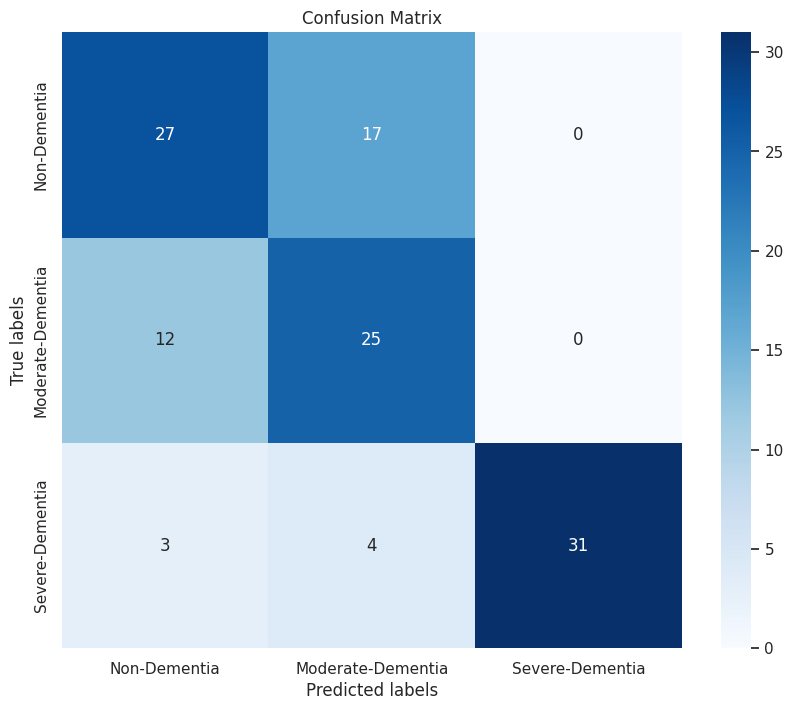

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

# Multi-class Logistic Regression
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
logistic_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic, zero_division=1)

print(f'Accuracy (Logistic Regression): {accuracy_logistic}')
print(f'Classification Report (Logistic Regression):\n{classification_report_logistic}')
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Dementia", "Moderate-Dementia", "Severe-Dementia"],
            yticklabels=["Non-Dementia", "Moderate-Dementia", "Severe-Dementia"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Test accuracy with the hybrid model: 0.7899159663865546
Test recall with the hybrid model is: 0.7899159663865546
Test AUC with the hybrid model is: 0.4976928147659855
Precision: 0.846158463385354
F1 Score: 0.7978298933070389
Confusion Matrix:
 [[32 12  0]
 [ 3 34  0]
 [ 0 10 28]]


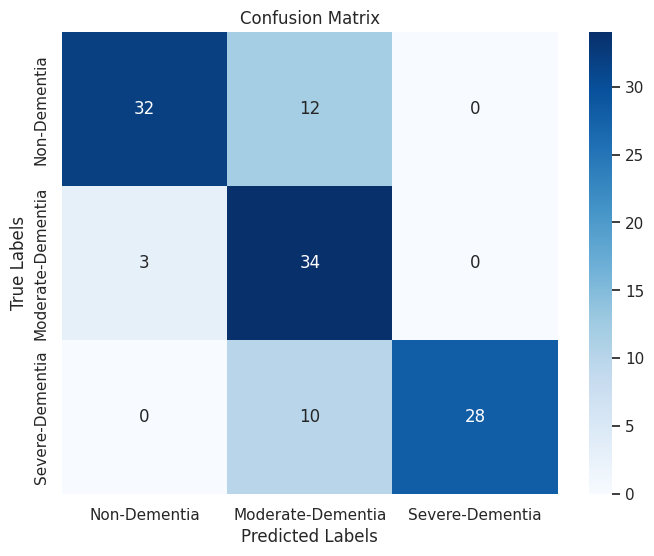

In [ ]:
from sklearn.metrics import classification_report, recall_score, roc_curve, auc
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

base_models = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=2)),
    ('Random Forest', RandomForestClassifier(n_estimators=2, max_depth=3, max_features=3)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=2, learning_rate=0.01)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=2, learning_rate=0.01, max_depth=2)),
    ('KNN', KNeighborsClassifier(n_neighbors=2)),
    ('LogisticRegression', LogisticRegression(multi_class='multinomial', solver='lbfgs',C=10, max_iter=10000))
]
voting_classifier = VotingClassifier(estimators=base_models, voting='hard')

voting_classifier.fit(X_train, y_train)

test_score = voting_classifier.score(X_test, y_test)
predictions = voting_classifier.predict(X_test)
classification_report_logistic = classification_report(y_test, predictions, zero_division=1)

# Calculate precision, recall, and F1-score using 'weighted' averaging
precision = precision_score(y_test, predictions, average='weighted')
test_recall = recall_score(y_test, predictions, average='weighted')
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)
test_auc = auc(fpr, tpr)
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)

print("Test accuracy with the hybrid model:", test_score)
print("Test recall with the hybrid model is:", test_recall)
print("Test AUC with the hybrid model is:", test_auc)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Dementia", "Moderate-Dementia", "Severe-Dementia"],
            yticklabels=["Non-Dementia", "Moderate-Dementia", "Severe-Dementia"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

user_input = [[1147,	0.810,	1.531]]
predicted_class = voting_classifier.predict(user_input)
dementia_severity_mapping = {
    0: "Non-Dementia",
    1: "Moderate-Dementia",
    2: "Severe-Dementia"
}

predicted_severity = dementia_severity_mapping[predicted_class[0]]
print("Predicted Dementia Severity Level:", predicted_severity)

Predicted Dementia Severity Level: Moderate-Dementia


In [ ]:
from google.colab import files
import joblib

joblib.dump(voting_classifier, 'stage_classifier.pkl')
files.download('stage_classifier.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>